# Sentiment Analysis Through Word Embeddings

In [1]:
import numpy as np
import pandas as pd
import gensim
import string
import re
import nltk
from wordcloud import WordCloud
from string import punctuation
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
data= pd.read_csv('Airline-Sentiment-2-w-AA.csv',encoding='latin-1')

from nltk.tokenize import TweetTokenizer
from autocorrect import Speller
tweet_tok=  TweetTokenizer()
spell=Speller(lang='en')
stop_nltk= stopwords.words("english")
stop_updated= stop_nltk+['user']+['https://t.co.']+[' http://t.co/']+['...'] +['http co']
lemm = WordNetLemmatizer()

def clean_text(text):
    tokens= tweet_tok.tokenize(text.lower())
    stemmed=[lemm.lemmatize(term) for term in tokens if term not in  stop_updated and term not in list(punctuation) and len(term)>2]
    stemmed_tok = [word for word in stemmed if word.isalpha()]
    stemmed_tokens = [spell(word) for word in stemmed_tok]
    res=' '.join(stemmed_tokens)
    return res

In [3]:
data['Clean_Tweets']= data['text'].apply(clean_text)

In [4]:
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('#','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('@','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('http','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('co','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('_ùª _ùª ','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('â_ù â_ù','')

In [4]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()  
data['flagged_sentiment']= x1.fit_transform(data['airline_sentiment'])

### Using Google's Pretrained Model- word2vec

In [5]:
google_model= "C:\\Users\\Arpitha Ananth\\Documents\\Programming in Data Science\\Text Processing\\word2vec\\GoogleNews-vectors-negative300.bin.gz"
embeddings= gensim.models.KeyedVectors.load_word2vec_format(google_model,binary=True)

In [6]:
docs_vectors= pd.DataFrame()
for doc in data['Clean_Tweets']:  
    temp= pd.DataFrame()        
    words= doc.split(' ')       
    for word in words:           
        try:
            words2vec= embeddings[word]               
            temp= temp.append(pd.Series(words2vec),ignore_index=True)  
            
        except:  
            pass
    doc_vector= temp.mean() 
    docs_vectors= docs_vectors.append(doc_vector,ignore_index= True)  
docs_vectors.head()    

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.009094,-0.044189,0.099609,-0.076172,-0.056641,0.061523,0.255859,-0.158203,0.016602,-0.096680,...,-0.193359,0.029907,-0.093262,0.053711,-0.117676,0.069824,0.105957,0.144531,0.180664,-0.086914
1,0.011475,-0.028662,-0.048035,0.028381,0.016113,0.005029,0.053278,-0.106189,0.100121,0.112695,...,-0.073389,0.079224,-0.044080,0.040007,-0.046777,0.063672,0.102014,-0.096680,0.005133,-0.038660
2,-0.002590,0.048671,0.035540,0.034947,-0.072335,0.029393,0.051392,-0.091666,0.017008,0.080023,...,-0.060529,0.023089,-0.013249,0.068396,0.065600,0.016942,-0.007010,-0.075910,0.066668,-0.069632
3,0.002969,0.097236,-0.018582,0.059896,-0.123081,0.062690,0.071913,-0.033997,0.069329,0.090702,...,-0.004829,0.029351,-0.014119,-0.005778,-0.064236,0.040677,0.076152,0.029161,-0.007053,-0.011149
4,0.110107,0.062714,0.003174,0.131836,-0.030945,-0.058258,0.097595,-0.039795,0.073257,0.130005,...,-0.119110,0.138916,-0.155151,-0.036743,-0.139221,-0.001038,-0.003777,-0.038452,0.109802,-0.061951


In [8]:
docs_vectors.isna().sum()

0      66
1      66
2      66
3      66
4      66
       ..
295    66
296    66
297    66
298    66
299    66
Length: 300, dtype: int64

In [9]:
docs_vectors= docs_vectors.fillna(method='ffill')

In [10]:
docs_vectors.isna().sum() 

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    0
Length: 300, dtype: int64

In [11]:
docs_vectors.shape

(14640, 300)

In [12]:
X= docs_vectors
y= data['flagged_sentiment'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

### Logistic Regression

In [15]:
LogReg= LogisticRegression()
LogReg= LogReg.fit(X_train,y_train)

y_pred= LogReg.predict(X_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
LRA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ", LRA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.7750455373406193
Confusion Matrix: 
[[2638  131   45]
 [ 477  336   71]
 [ 183   81  430]]


In [17]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
LogReg= multiclass_roc_auc_score(y_test,y_pred)
LogReg

0.7378483442804221

### KNN

In [19]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred= knn.predict(X_test)

In [20]:
KNNA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",KNNA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.7363387978142076
Confusion Matrix: 
[[2669   91   54]
 [ 617  217   50]
 [ 295   51  348]]


In [21]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
KNN= multiclass_roc_auc_score(y_test,y_pred)
KNN

0.6748064963464971

### Decision Tree

In [27]:
dtc= DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)
y_pred= dtc.predict(X_test)

In [28]:
DTA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",DTA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.6318306010928961
Confusion Matrix: 
[[2111  436  267]
 [ 403  337  144]
 [ 236  131  327]]


In [29]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
DT= multiclass_roc_auc_score(y_test,y_pred)
DT

0.6541443794636213

### Random Forest

In [31]:
rf= RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)

In [32]:
RFA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",RFA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.7509107468123861
Confusion Matrix: 
[[2696   98   20]
 [ 557  281   46]
 [ 320   53  321]]


In [33]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
RF= multiclass_roc_auc_score(y_test,y_pred)
RF

0.686969564452571

### Ada Boost Classifier

In [35]:
ada= AdaBoostClassifier(n_estimators=100,random_state=0)
ada.fit(X_train,y_train)
y_pred= ada.predict(X_test)

In [36]:
ADAA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",ADAA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.7358834244080146
Confusion Matrix: 
[[2463  233  118]
 [ 450  345   89]
 [ 180   90  424]]


In [37]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
AD= multiclass_roc_auc_score(y_test,y_pred)
AD

0.7215330037904361

### Gradient Boost Algorithm

In [39]:
gradient= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
gradient.fit(X_train,y_train)
y_pred= gradient.predict(X_test)

In [40]:
GBA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",GBA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.770264116575592
Confusion Matrix: 
[[2604  149   61]
 [ 452  370   62]
 [ 207   78  409]]


In [41]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
GB= multiclass_roc_auc_score(y_test,y_pred)
GB

0.7362791084994744

### XG Boost Algorithm

In [43]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
Xg= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
Xg.fit(X_train,y_train)
y_pred= Xg.predict(X_test)

In [44]:
XGA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",XGA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.770264116575592
Confusion Matrix: 
[[2604  149   61]
 [ 452  370   62]
 [ 207   78  409]]


In [45]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
XG= multiclass_roc_auc_score(y_test,y_pred)
XG

0.7362791084994744

### Comparison Of ML Models

In [47]:
Algorithms= ['Logistic Regression','KNN','Decision Tree','Random Forest','Ada Boost','Gradient Boost','XG Boost']
Accuracy= [LRA,KNNA,DTA,RFA,ADAA,GBA,XGA]
AUC_ROC= [LogReg,KNN,DT,RF,AD,GB,XG]
comp= pd.DataFrame([Accuracy,AUC_ROC]).T
comp.set_index([Algorithms],inplace=True)
comp.columns=['Accuracy','AUC-ROC']
comp

,Accuracy,AUC-ROC
Logistic Regression,0.775046,0.737848
KNN,0.736339,0.674806
Decision Tree,0.631831,0.654144
Random Forest,0.750911,0.686970
Ada Boost,0.735883,0.721533
Gradient Boost,0.770264,0.736279
XG Boost,0.770264,0.736279


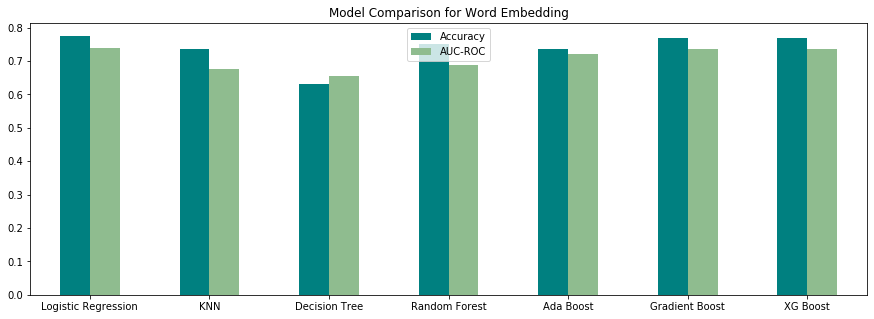

In [55]:
comp.plot(kind='bar',figsize=(15,5),rot=0,title='Model Comparison for Word Embedding',colors=['teal','darkseagreen'])